## 2.2.1 迷你案例：高维数据的可视化

1.调用库和模块

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

2.提取数据集

In [2]:
iris = load_iris()
x = iris.data
y = iris.target
#作为数组，X是几维呢？
print("x.shape:",x.shape)
import pandas as pd
data_x = pd.DataFrame(x)
data_x.head()

x.shape: (150, 4)


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


3.建模

In [3]:
#调用pca
pca = PCA(n_components=2)#实例化
pca = pca.fit(x)#拟合模型
x_dr = pca.transform(x)#获取新的矩阵
# x_dr
#也可以直接fit_transform一步到位
#x_dr = PCA(2).fit_t'ransf(x)

In [6]:
x_dr.shape

(150, 2)

4.可视化

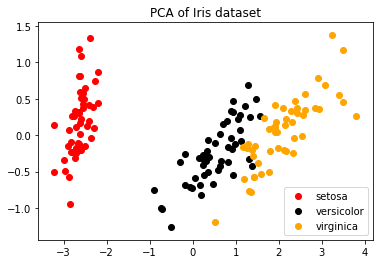

In [7]:
#将三种鸢尾花的数据分布显示在二维坐标中，对应的连个坐标（2个特征向量
#因嘎嘎i是三种鸢尾花降维后的x1,x2，怎么样才能去除三种鸢尾花下不同的x1,x2
x_dr[y == 0,0] #布尔索引
plt.figure()
plt.scatter(x_dr[y==0,0],x_dr[y==0,1],c='red',label=iris.target_names[0])
plt.scatter(x_dr[y==1,0],x_dr[y==1,1],c='black',label=iris.target_names[1])
plt.scatter(x_dr[y==2,0],x_dr[y==2,1],c='orange',label=iris.target_names[2])
plt.legend()
plt.title('PCA of Iris dataset')
plt.show()

6.探索降维后的数据

In [8]:
#方差：explained_variance,查看降维后每个特征向量上所带的信息量大小（可解释性方差的大小）
pca.explained_variance_

array([4.22824171, 0.24267075])

In [9]:
#属性explained_variance_ratio，查看降维后每个新特征向量所占信息量占原始
#数据总信息量的百分比，又叫做可解释方差贡献率
pca.explained_variance_ratio_#说明信息大部分集中在第一个特征上

array([0.92461872, 0.05306648])

In [10]:
pca.explained_variance_ratio_.sum()

0.977685206318795

7.选择最好的n_components:累计可解释方差贡献率曲线

In [12]:
import numpy as np
pca_line = PCA().fit(x)

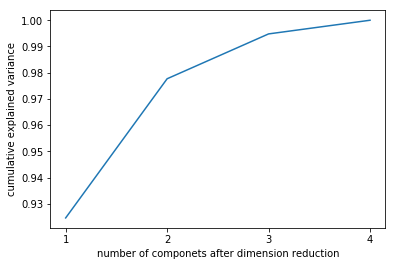

In [13]:
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4])#这里为了限制坐标轴显示为整数
plt.xlabel("number of componets after dimension reduction")
plt.ylabel("cumulative explained variance")
plt.show()

2.2.2 最大似然估计自选超参数

In [14]:
pca_mle = PCA(n_components="mle").fit(x)
x_mle = pca_mle.transform(x)
x_mle

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [15]:
#发现pca自动选择了3个特征
pca_mle.explained_variance_ratio_.sum()

0.9947878161267247